<a href="https://colab.research.google.com/github/kenithleon/computer-vison-prg/blob/main/Image_Filtering_and_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

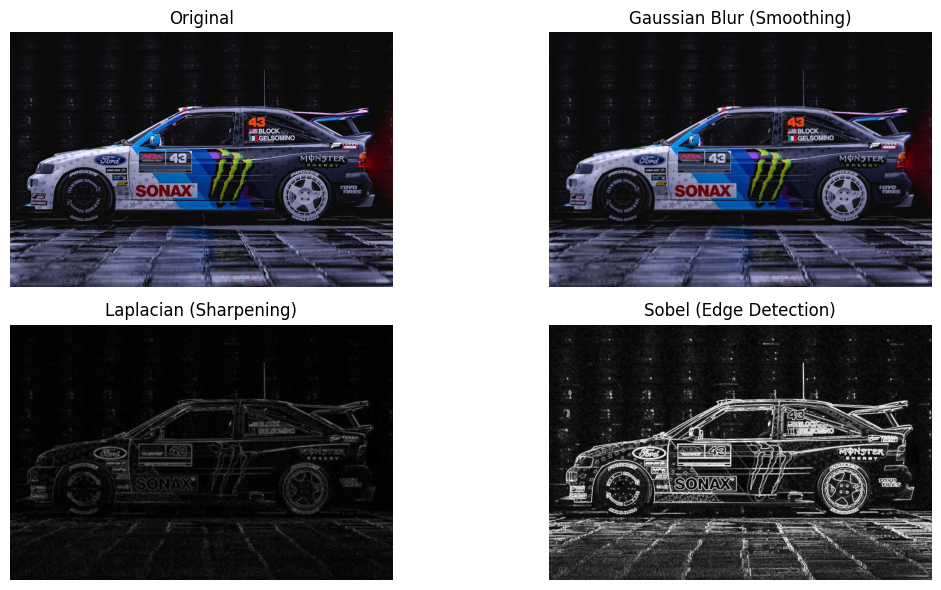

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Load an image
# ------------------------------
# Change 'your_image.jpg' to your actual file name
image = cv2.imread('/content/wp11249668-1994-hoonigan-ford-escort-rs-cosworth-wrc-cossie-v2-wallpapers.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plotting

# ------------------------------
# Step 2: Apply Convolution Masks
# ------------------------------

# (i) Smoothing (Blurring) - Gaussian Kernel
gaussian_blur = cv2.GaussianBlur(image, (5,5), 0)
# (5,5) → kernel size, larger size = more blur
# 0 → standard deviation automatically chosen

# (ii) Sharpening - Laplacian High-pass Filter
laplacian = cv2.Laplacian(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# (iii) Edge Detection - Sobel Operator
sobel_x = cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# ------------------------------
# Step 3: Show Results
# ------------------------------
titles = ['Original', 'Gaussian Blur (Smoothing)', 'Laplacian (Sharpening)', 'Sobel (Edge Detection)']
images = [image, gaussian_blur, laplacian, sobel_combined]

plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    if len(images[i].shape) == 2:  # Gray image
        plt.imshow(images[i], cmap='gray')
    else:  # Color image
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()